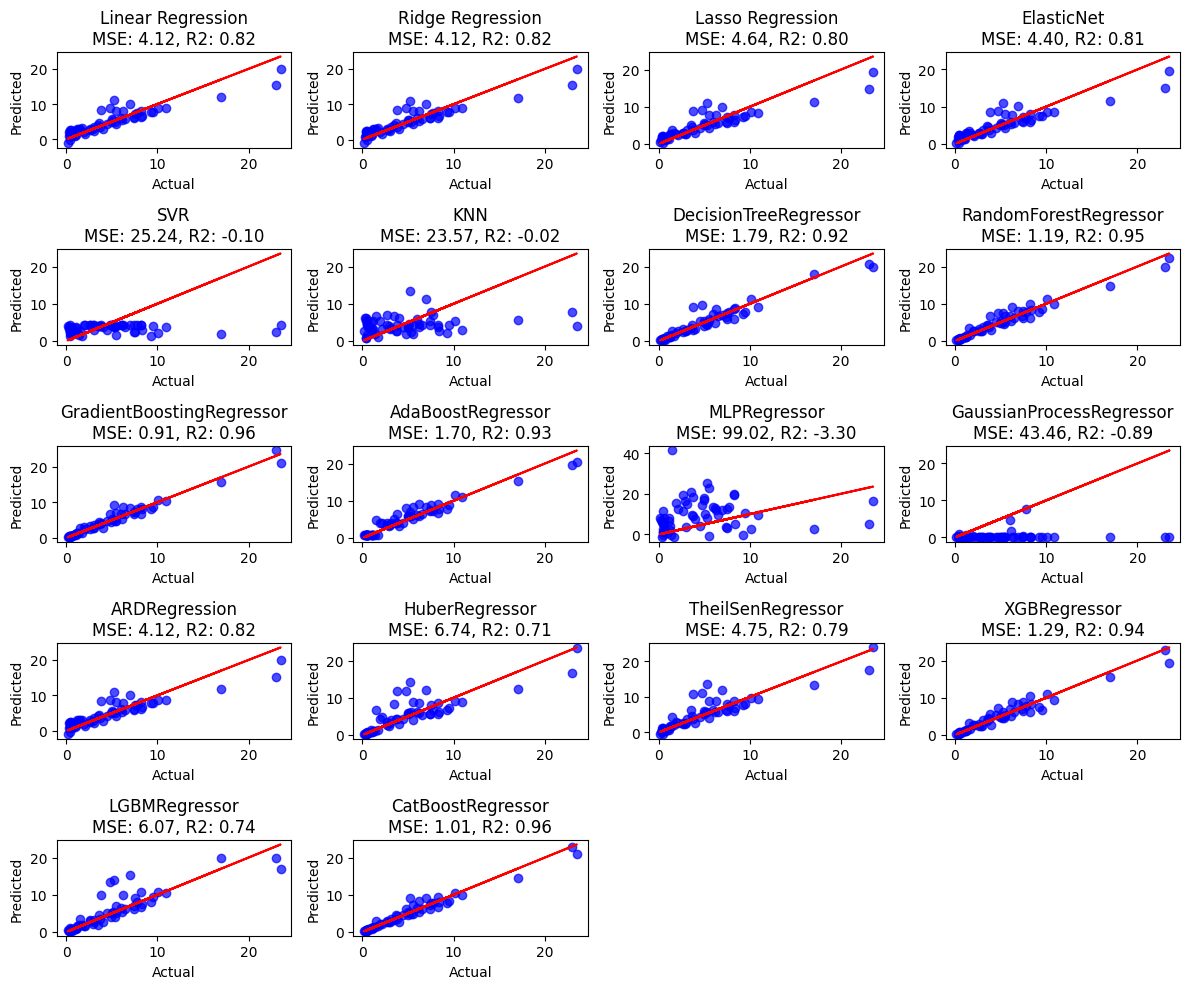

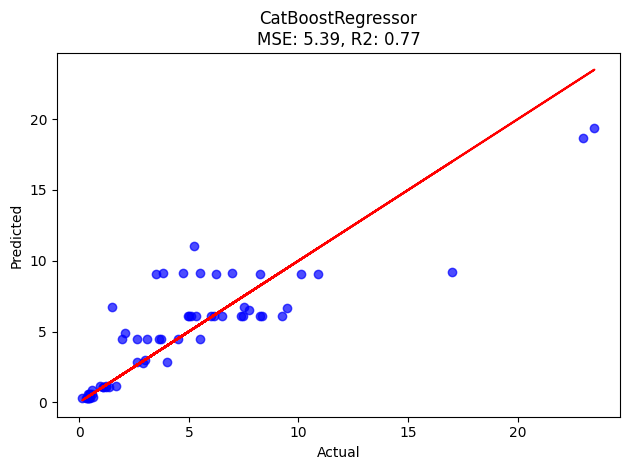

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import ARDRegression, HuberRegressor, TheilSenRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Load the dataset
df = pd.read_csv('/kaggle/input/car-price-prediction-dataset/car_prediction_data.csv')

# Feature engineering: Calculating car age
df['Car_age'] = 2023 - df['Year']

# Selecting features and target variable
X = df[['Present_Price', 'Kms_Driven', 'Owner', 'Car_age']]
y = df['Selling_Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit different regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'MLPRegressor': MLPRegressor(),
    'GaussianProcessRegressor': GaussianProcessRegressor(),
    'ARDRegression': ARDRegression(),
    'HuberRegressor': HuberRegressor(),
    'TheilSenRegressor': TheilSenRegressor(),
    # IsotonicRegression is excluded due to its specific input requirements
    'XGBRegressor': XGBRegressor(),
    'LGBMRegressor': LGBMRegressor(),
    'CatBoostRegressor': CatBoostRegressor(silent=True)
}

plt.figure(figsize=(12, 10))

for idx, (name, regressor) in enumerate(regressors.items(), 1):
    plt.subplot(5, 4, idx)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    with open(f"{name}","wb") as f:
        pickle.dump(regressor,f)
    
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot(y_test, y_test, color='red')  # Plotting the ideal prediction line
    
    plt.title(f"{name}\nMSE: {mse:.2f}, R2: {r2:.2f}")
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.tight_layout()


plt.show()
X_train, X_test, y_train, y_test = train_test_split(X['Present_Price'], y, test_size=0.2, random_state=42)

# Initialize and fit Isotonic Regression on a single feature
regressor = IsotonicRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
with open(f"{name}","wb") as f:
    pickle.dump(regressor,f)
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot(y_test, y_test, color='red')  # Plotting the ideal prediction line
plt.title(f"{name}\nMSE: {mse:.2f}, R2: {r2:.2f}")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()

plt.show()


In [67]:
import pickle
import pandas as pd

model = pickle.load(open('GradientBoostingRegressor', 'rb'))

df = pd.read_csv('/kaggle/input/car-price-prediction-dataset/car_prediction_data.csv')

df['Car_age'] = 2023 - df['Year']
X = df[['Present_Price', 'Kms_Driven', 'Owner', 'Car_age']]
y = df['Selling_Price']
predictions = model.predict(X)

print(predictions)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}\n")

[ 3.51969598  5.03714538  7.83263637  2.44184695  4.30690574  8.00150783
  6.80618634  6.59968219  7.89815601  6.70255444  2.84767874  7.24630955
  7.3563224   5.46330471  2.78935011  7.9744664   7.19542862  7.9744664
  3.32285425  2.83458338  2.65891057  5.07348377  3.54576266  2.51563968
  2.64819579  2.769459    3.88306546  5.75125026  2.0445054   7.26128339
  3.54932088  2.62261236  4.6424114   6.66172956  5.70945306  3.32296908
  4.67478712  0.38005302  2.68422289  2.18923528  5.8746198   2.51563968
  2.98419105  5.70945306  1.10760759  7.34841356  2.4016933   1.29647812
  5.46330471  7.81938408 14.86846332 22.69418649 17.95061324 15.60055673
  2.72677396  3.92862459  4.38663125  6.73284991  4.43896593 20.06965502
  8.45516712  5.11822463 19.04482952 20.90819026 33.04074053  4.37276051
 19.325213    9.27657589  4.7761777  14.67569062  4.32991336  4.33826196
  7.5586939   3.3974798   5.55486691  4.51849375  7.00864466  2.73415229
  9.09765959 14.86846332 13.84849358  5.40003637 24.

In [68]:
print(X)

     Present_Price  Kms_Driven  Owner  Car_age
0             5.59       27000      0        9
1             9.54       43000      0       10
2             9.85        6900      0        6
3             4.15        5200      0       12
4             6.87       42450      0        9
..             ...         ...    ...      ...
296          11.60       33988      0        7
297           5.90       60000      0        8
298          11.00       87934      0       14
299          12.50        9000      0        6
300           5.90        5464      0        7

[301 rows x 4 columns]
